In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import os
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D,MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt


2022-12-07 15:41:04.973984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Labeling Data

# Training/Test Dataset

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory("/Users/cedricbeugre/Desktop/Deep-learning-Project-1/Dataset/Train",batch_size=32,image_size=(256, 256),shuffle=True)
test_dataset = tf.keras.utils.image_dataset_from_directory("/Users/cedricbeugre/Desktop/Deep-learning-Project-1/Dataset/Test",batch_size=32,image_size=(256, 256),shuffle=True)

class_names = train_dataset.class_names
print(class_names)

Found 12396 files belonging to 3 classes.
Found 3373 files belonging to 3 classes.
['Incorrectly', 'Withmask', 'Withoutmask']


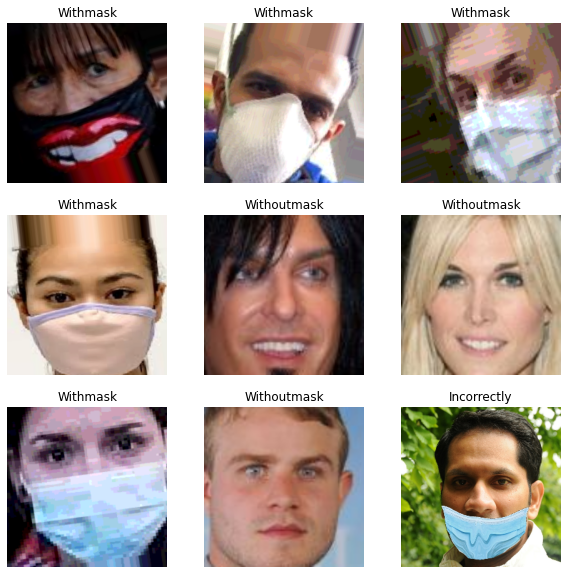

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
images = Input((256, 256, 3,))
inputsize = images.shape[1:]

In [ ]:
CNN_1 = Sequential()

CNN_1 = Conv2D(32, kernel_size=(5,5),padding='valid',activation="relu", input_shape=inputsize)(images)
CNN_1 = MaxPooling2D(pool_size=(2,2))(CNN_1)
CNN_1 = Conv2D(64, kernel_size=(5,5),padding='valid',activation="relu")(CNN_1)
CNN_1 = MaxPooling2D(pool_size=(2,2))(CNN_1)
CNN_1 = Flatten()(CNN_1)
CNN_1 = Dense(256)(CNN_1)
CNN_1 = Dense(3)(CNN_1)

predictions = Activation("softmax")(CNN_1)

cnn_1 = Model(inputs=images, outputs=predictions)

cnn_1.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])


print(cnn_1.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0     

In [ ]:
cnn_1.fit(train_dataset,validation_data=test_dataset,epochs=15)

In [ ]:
cnn_1.save("cnn1.h5")

In [ ]:
cnn_1.evaluate(test_dataset)

In [9]:
CNN_3 = Sequential()

CNN_3 = Conv2D(32, kernel_size=(3,3),padding='same',activation="tanh", input_shape=inputsize)(images)
CNN_3 = MaxPooling2D(pool_size=(2, 2))(CNN_3)
CNN_3 = Conv2D(64, kernel_size=(3,3),padding='same',activation="tanh")(CNN_3)
CNN_3 = MaxPooling2D(pool_size=(2, 2))(CNN_3)
CNN_3 = Conv2D(128, kernel_size=(3,3),padding='same',activation="tanh")(CNN_3)

CNN_3 = MaxPooling2D(pool_size=(2, 2))(CNN_3)

CNN_3 = Flatten()(CNN_3)
CNN_3 = Dense(1024)(CNN_3)
CNN_3 = Dropout(0.20)(CNN_3)
CNN_3 = BatchNormalization(momentum=0.9)(CNN_3)
CNN_3 = Dense(512)(CNN_3)
CNN_3 = Dense(3)(CNN_3)

predictions = Activation("softmax")(CNN_3)

cnn_3 = Model(inputs=images, outputs=predictions)

cnn_3.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])


print(cnn_3.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856 

In [10]:
cnn_3.fit(train_dataset,validation_data=test_dataset,epochs=15)

Epoch 1/15
388/388 [==============================] - 1108s 3s/step - loss: 0.3576 - acc: 0.9142 - val_loss: 0.1428 - val_acc: 0.9552
Epoch 2/15
388/388 [==============================] - 872s 2s/step - loss: 0.1199 - acc: 0.9612 - val_loss: 0.0913 - val_acc: 0.9677
Epoch 3/15
388/388 [==============================] - 815s 2s/step - loss: 0.0853 - acc: 0.9704 - val_loss: 0.2078 - val_acc: 0.9253
Epoch 4/15
388/388 [==============================] - 859s 2s/step - loss: 0.1044 - acc: 0.9655 - val_loss: 0.1409 - val_acc: 0.9472
Epoch 5/15
388/388 [==============================] - 948s 2s/step - loss: 0.1262 - acc: 0.9564 - val_loss: 0.4486 - val_acc: 0.8473
Epoch 6/15
388/388 [==============================] - 968s 2s/step - loss: 0.1356 - acc: 0.9542 - val_loss: 0.4103 - val_acc: 0.8340
Epoch 7/15
388/388 [==============================] - 818s 2s/step - loss: 0.1292 - acc: 0.9548 - val_loss: 0.5344 - val_acc: 0.8467
Epoch 8/15
388/388 [==============================] - 825s 2s/step -

In [6]:
cnn_3.save("cnn3_1.h5")

NameError: name 'cnn_3' is not defined

In [10]:

model = tf.keras.models.load_model('cnn3_1.h5')

model.summary()
model.evaluate(test_dataset)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856 

[0.05452994629740715, 0.9783575534820557]

In [18]:
CNN_4 = Sequential()

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(images)

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = MaxPooling2D(pool_size=(2, 2))(CNN_4)

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = MaxPooling2D(pool_size=(2, 2))(CNN_4)

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = MaxPooling2D(pool_size=(2, 2))(CNN_4)

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = MaxPooling2D(pool_size=(2, 2))(CNN_4)

CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = Conv2D(32, kernel_size=(3,3),padding='same',activation="relu", input_shape=inputsize)(CNN_4)
CNN_4 = MaxPooling2D(pool_size=(2, 2))(CNN_4)

CNN_4 = Flatten()(CNN_4)
CNN_4 = Dense(512)(CNN_4)
CNN_4 = Dense(3)(CNN_4)


predictions = Activation("softmax")(CNN_4)


cnn_4 = Model(inputs=images, outputs=predictions)

cnn_4.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])

print(cnn_4.summary())


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_60 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_61 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 conv2d_62 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 128, 128, 32)      9248      
                                                           

In [19]:
cnn_4.fit(train_dataset,validation_data=test_dataset,epochs=15)

Epoch 1/15
388/388 [==============================] - 1361s 4s/step - loss: 0.2226 - acc: 0.9212 - val_loss: 0.1270 - val_acc: 0.9668
Epoch 2/15
388/388 [==============================] - 1317s 3s/step - loss: 0.0954 - acc: 0.9685 - val_loss: 0.0920 - val_acc: 0.9757
Epoch 3/15
388/388 [==============================] - 1337s 3s/step - loss: 0.0616 - acc: 0.9790 - val_loss: 0.0644 - val_acc: 0.9801
Epoch 4/15
 51/388 [==>...........................] - ETA: 20:08 - loss: 0.0264 - acc: 0.9920

KeyboardInterrupt: 

In [ ]:
test_dataset

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
d = {'Y': Y, 'X': X}
df = pd.DataFrame(data=d)
df

In [ ]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

In [ ]:
training_data

In [ ]:
testing_data

In [ ]:
image = Image.open(testing_data.iloc[1]["X"])
data = asarray(image)
plt.imshow(data,cmap='gray')
plt.show()

In [ ]:
X = []
Y = []

link = training_data["X"].to_list()
Y = training_data["Y"].to_list()

for x in link:
    data = asarray(Image.open(x))
    X.append(data)

print(len(X))
print(len(Y))
    

In [ ]:
for x in range(5):
    plt.imshow(X[7],cmap="gray")

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam


In [ ]:
# COMPLETE THE CODE ACCORDING TO THE COMMENTS
# specify the input size of the images
images = Input((train_x.shape[1], train_x.shape[2], 1,))
inputsize = images.shape[1:]
#print(inputsize)
x = Sequential()


# a convolution layer of 32 filters of size 9x9 to extract features (valid padding)
x= Conv2D(32, kernel_size=(9,9),padding='valid', input_shape=inputsize)(images)
# a maxpooling layer to down-sample features with pool size (2, 2)
x= MaxPooling2D(pool_size=(2, 2))(x)
# another convolution layer of 64 filters of size 11x11 to extract features (valid padding)
x = Conv2D(64, kernel_size=(3,3),padding='valid')(x)
# a maxpooling layer to down-sample features with pool size (2, 2)
x = MaxPooling2D(pool_size=(2, 2))(x)
# flatten extracted features to form feature vector
x = Flatten()(x)
# a drop out layer for regularization (25% probability)
x = Dropout(0.25)(x)
# first fully-connected layer to map the features to vectors of size 256
x = Dense(256)(x)
# anoter drop out layer for regularization (25% probability)
x = Dropout(0.25)(x)
# a second fully-connected layer to map the features to a logit vector with one logit per subject
x = Dense(num_subjects)(x)
# use softmax activation to convert the logits to class probabilities for each subject
predictions = Activation("softmax")(x)


# create the model using the layers we defined previously
sample_cnn = Model(inputs=images, outputs=predictions)

# compile the model so that it uses Adam for optimization during training with cross-entropy loss
sample_cnn.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])

# print out a summary of the model achitecture
print(sample_cnn.summary())

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"
configFile = "deploy.prototxt"

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    h, w = frame.shape[:2]
    
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
    net.setInput(blob)
    faces = net.forward()

    for i in range(0, faces.shape[2]):
        confidence = faces[0, 0, i, 2]
        if confidence > 0.5:
            box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
            print(box)
            (x, y, x1, y1) = box.astype("int")
            cv2.rectangle(frame, (x, y), (x1, y1), (0, 0, 255), 3)
 
    cv2.imshow('fe',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

 